# 1. CatBoost Regressor

CatBoost is used because all features are categorical, and the algorithm is well suited for handling categorical variables. It often delivers strong performance without extensive preprocessing such as one-hot encoding.

## 1.1. Import libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.5 MB/s eta 0:00:00


In [ ]:
import catboost as cb
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 1.2. Upload Data

In [ ]:
df_I = pd.read_csv("/content/df_Ins_ML.csv", sep=',', on_bad_lines='warn')
df_I.head()

,InstanceId,WfDefinitionId,StatusCd,InstanceSourceId,StartTime,EndTime,RelatedStepId,groupname,division,team1,unit,startgroupname,Start_Month,Start_Week,End_Month,End_Week,Duration
0,10003850078,4095,CNC,10004,2021-03-19 23:26:02.260,2021-03-24 10:05:52.409,0,EE-RHB-HRH-RHC,RBINCHB HCBIRECHER & BHNBIEREHB,RBINCHB HCBIRECHER CIHHBRR RRERBBRBEE,HJREHRBI RBINCHB HCBIRECHER,EE-RHB-HRH-RHC,3,11,3,12,106.663930
1,10003045706,4095,CMP,10006,2021-02-25 16:02:58.628,2021-03-11 09:08:16.600,0,EE-RHB-HRH-RHC,RBINCHB HCBIRECHER & BHNBIEREHB,RBINCHB HCBIRECHER CIHHBRR RRERBBRBEE,HJREHRBI RBINCHB HCBIRECHER,EE-RHB-HRH-RHC,2,8,3,10,329.088326
2,10002677992,4087,CMP,10006,2021-02-15 21:11:11.857,2021-02-25 18:39:42.533,0,EE-RHB-HRH-RHC,RBINCHB HCBIRECHER & BHNBIEREHB,RBINCHB HCBIRECHER CIHHBRR RRERBBRBEE,HJREHRBI RBINCHB HCBIRECHER,EE-RHB-HRH-RHC,2,7,2,8,237.475188
3,10005932762,4110,CMP,10001,2021-05-17 21:58:06.871,2021-05-18 01:13:38.387,0,EE-RHB-RHH-CHE,RBINCHB HCBIRECHER & BHNBIEREHB,CHE HCBIRECHER,RBINCHB HCBIRECHER HBEEBI,EE-RHB-RHH-CHE,5,20,5,20,3.258754
4,10005828208,4110,CNC,10001,2021-05-14 00:20:52.924,2021-05-17 04:00:34.401,0,EE-RHB-RHH-CHE,RBINCHB HCBIRECHER & BHNBIEREHB,CHE HCBIRECHER,RBINCHB HCBIRECHER HBEEBI,EE-RHB-RHH-CHE,5,19,5,20,75.661521


- We need to drop the columns, which we created for EDA, to make sure that we do not have any features that may affect the performance of our ML algorithm artificially.

In [ ]:
df_I = df_I.drop(['StartTime', 'EndTime', 'End_Month', 'End_Week'], axis=1)
df_I.head()

,InstanceId,WfDefinitionId,StatusCd,InstanceSourceId,RelatedStepId,groupname,division,team1,unit,startgroupname,Start_Month,Start_Week,Duration
0,10003850078,4095,CNC,10004,0,EE-RHB-HRH-RHC,RBINCHB HCBIRECHER & BHNBIEREHB,RBINCHB HCBIRECHER CIHHBRR RRERBBRBEE,HJREHRBI RBINCHB HCBIRECHER,EE-RHB-HRH-RHC,3,11,106.663930
1,10003045706,4095,CMP,10006,0,EE-RHB-HRH-RHC,RBINCHB HCBIRECHER & BHNBIEREHB,RBINCHB HCBIRECHER CIHHBRR RRERBBRBEE,HJREHRBI RBINCHB HCBIRECHER,EE-RHB-HRH-RHC,2,8,329.088326
2,10002677992,4087,CMP,10006,0,EE-RHB-HRH-RHC,RBINCHB HCBIRECHER & BHNBIEREHB,RBINCHB HCBIRECHER CIHHBRR RRERBBRBEE,HJREHRBI RBINCHB HCBIRECHER,EE-RHB-HRH-RHC,2,7,237.475188
3,10005932762,4110,CMP,10001,0,EE-RHB-RHH-CHE,RBINCHB HCBIRECHER & BHNBIEREHB,CHE HCBIRECHER,RBINCHB HCBIRECHER HBEEBI,EE-RHB-RHH-CHE,5,20,3.258754
4,10005828208,4110,CNC,10001,0,EE-RHB-RHH-CHE,RBINCHB HCBIRECHER & BHNBIEREHB,CHE HCBIRECHER,RBINCHB HCBIRECHER HBEEBI,EE-RHB-RHH-CHE,5,19,75.661521


## 1.3. Prepare for the algorithm
- Identify the categorical columns and make sure that their types are correct in the data frame

In [ ]:
cat_columns = ['WfDefinitionId', 'StatusCd','InstanceSourceId', 'groupname', 'division', 'team1', 'unit', 'startgroupname','Start_Month']
df_I[cat_columns] = df_I[cat_columns].astype('category')

print(df_I.info())
df_I.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32803 entries, 0 to 32802
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   InstanceId        32803 non-null  int64   
 1   WfDefinitionId    32803 non-null  category
 2   StatusCd          32803 non-null  category
 3   InstanceSourceId  32803 non-null  category
 4   RelatedStepId     32803 non-null  int64   
 5   groupname         32803 non-null  category
 6   division          32803 non-null  category
 7   team1             32803 non-null  category
 8   unit              32803 non-null  category
 9   startgroupname    32803 non-null  category
 10  Start_Month       32803 non-null  category
 11  Start_Week        32803 non-null  int64   
 12  Duration          32803 non-null  float64 
dtypes: category(9), float64(1), int64(3)
memory usage: 1.3 MB
None


Index(['InstanceId', 'WfDefinitionId', 'StatusCd', 'InstanceSourceId',
       'RelatedStepId', 'groupname', 'division', 'team1', 'unit',
       'startgroupname', 'Start_Month', 'Start_Week', 'Duration'],
      dtype='object')

- Decide on the features that we will use in the algorithm and define our target variable

In [ ]:
input_features = ['WfDefinitionId', 'InstanceSourceId',
       'groupname', 'division',
       'team1', 'unit', 'startgroupname', 'Start_Month', 'Start_Week']
target_feature = 'Duration'

## 1.4. Train and test set split

In [ ]:
from sklearn.model_selection import train_test_split

X = df_I[input_features]
y = df_I[target_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 1.5. Create the model and fit the train set

In [ ]:
categorical_feature_indices = np.where(X.dtypes == 'category')[0]
model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0)
model.fit(X_train, y_train, cat_features=categorical_feature_indices)  # Assuming you have identified categorical feature indexes

## 1.6. Measure the performance of our algorithm

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [ ]:
#Make predictions
y_pred = model.predict(X_test)

# Evaluate using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print('r2', r2_score(y_test, y_pred))

Mean Squared Error: 190819.64
r2 0.6460654542455233


## 1.7. Get the importance levels of features

In [ ]:
feature_importance = model.get_feature_importance()
feature_names = X.columns

# Display feature importance
for name, importance in zip(feature_names, feature_importance):
    print(f"Feature: {name}, Importance: {importance:.2f}")

Feature: WfDefinitionId, Importance: 36.87
Feature: InstanceSourceId, Importance: 4.91
Feature: groupname, Importance: 0.43
Feature: division, Importance: 0.80
Feature: team1, Importance: 0.16
Feature: unit, Importance: 0.61
Feature: startgroupname, Importance: 0.71
Feature: Start_Month, Importance: 28.92
Feature: Start_Week, Importance: 26.61


/tmp/ipython-input-1070762948.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


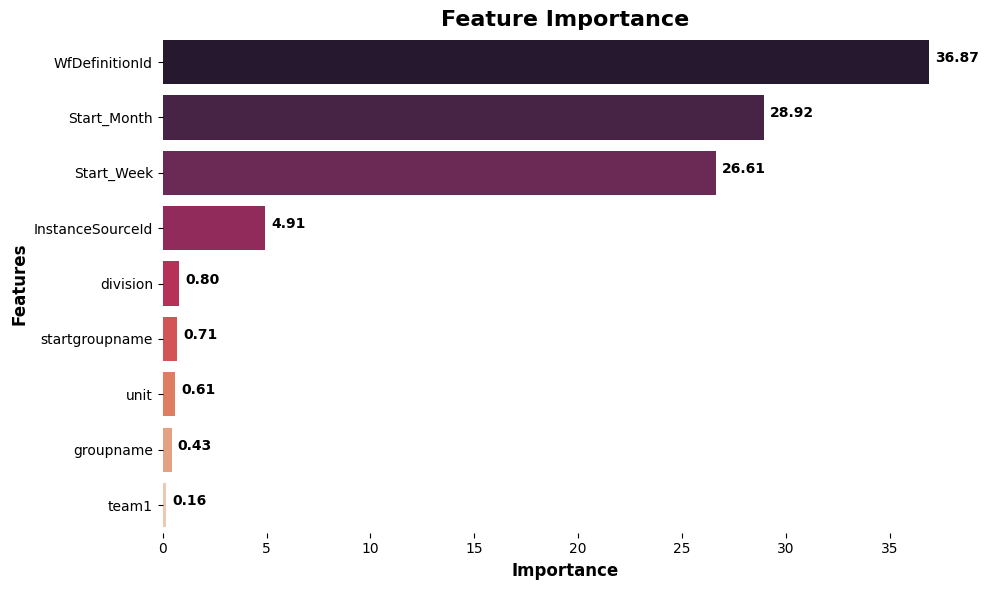

In [ ]:
# Create DataFrame and sort
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=fi_df,
    palette='rocket'
)

plt.title('Feature Importance', fontweight='bold', fontsize=16)
plt.xlabel('Importance', fontweight='bold', fontsize=12)
plt.ylabel('Features', fontweight='bold', fontsize=12)

# Add data labels
for i, value in enumerate(fi_df['Importance']):
    plt.text(value + 0.3, i, f'{value:.2f}', fontweight='bold', fontsize=10)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


### Workflow Definition ID is the most important feature, followed by the time that the ticket is opened.

## 1.8. Cross - Validation (CV)

In [ ]:
X = df_I[input_features]
y = df_I[target_feature]

categorical_feature_indices = np.where(X.dtypes =='category')[0]

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
r2_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = CatBoostRegressor(
        iterations=500,
        learning_rate=0.1,
        depth=6,
        verbose=0
    )

    model.fit(
        X_train, y_train,
        cat_features=categorical_feature_indices
    )

    y_pred = model.predict(X_val)

    mse_scores.append(mean_squared_error(y_val, y_pred))
    r2_scores.append(r2_score(y_val, y_pred))

    print(f"Fold {fold + 1} | MSE: {mse_scores[-1]:.2f} | R2: {r2_scores[-1]:.3f}")


Fold 1 | MSE: 191180.35 | R2: 0.645
Fold 2 | MSE: 163711.43 | R2: 0.670
Fold 3 | MSE: 176733.82 | R2: 0.639
Fold 4 | MSE: 170918.40 | R2: 0.642
Fold 5 | MSE: 157736.29 | R2: 0.687


In [ ]:
print(f"\nCV MSE: {np.mean(mse_scores):.2f} ± {np.std(mse_scores):.2f}")
print(f"CV R2 : {np.mean(r2_scores):.3f}")



CV MSE: 172056.06 ± 11520.44
CV R2 : 0.657


- R2 level is not bad for a forecast of a duration that depends on a workflow.

# 2. Xgboost Regressor

- XgBoost also works well with categorical features.

## 2.1. Create the feature and target variable sets

In [ ]:
X = df_I[input_features]
y = df_I[target_feature]


## 2.2. Encoding
- We need to encode our categorical variables since xgboost does not handle categorical variables implicity as cat boost.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_cols = X.select_dtypes(include=['category', 'object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['category', 'object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

## 2.3. Create the model

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)


## 2.4. Pipeline for Cross-Validation
- This time we will do the cross validation using pipeline.

- We will apply this to whole data set (no train-test split).

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', xgb_model)
    ]
)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = -cross_val_score(
    pipeline,
    X,
    y,
    cv=kf,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

r2_scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=kf,
    scoring='r2',
    n_jobs=-1
)

print(f"MSE: {mse_scores.mean():.2f} ± {mse_scores.std():.2f}")
print(f"R2 : {r2_scores.mean():.3f}")


MSE: 170756.58 ± 10818.47
R2 : 0.659


## 2.5. Train Test Data Split and Performance Test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R2 :", r2_score(y_test, y_pred))


Test MSE: 188046.60212016612
Test R2 : 0.6512089175289287


- R2 level is not bad for a forecast of a duration that depends on a workflow. We obtain a simlar result with CatBoost.

# 3. Analyze Target Variable
- Let's analyze our target variable and see if it is possible to increase the performance of our algorithms

In [ ]:
print(df_I['Duration'].describe())

count    32803.000000
mean       519.276751
std        707.992600
min          0.020779
25%        111.912252
50%        266.759197
75%        619.148455
max       8344.107740
Name: Duration, dtype: float64


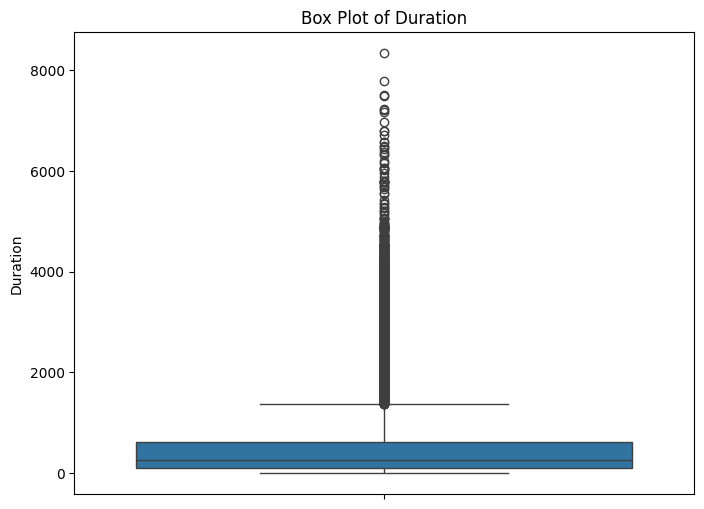

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_I['Duration'])
plt.title('Box Plot of Duration')
plt.ylabel('Duration')
plt.show()

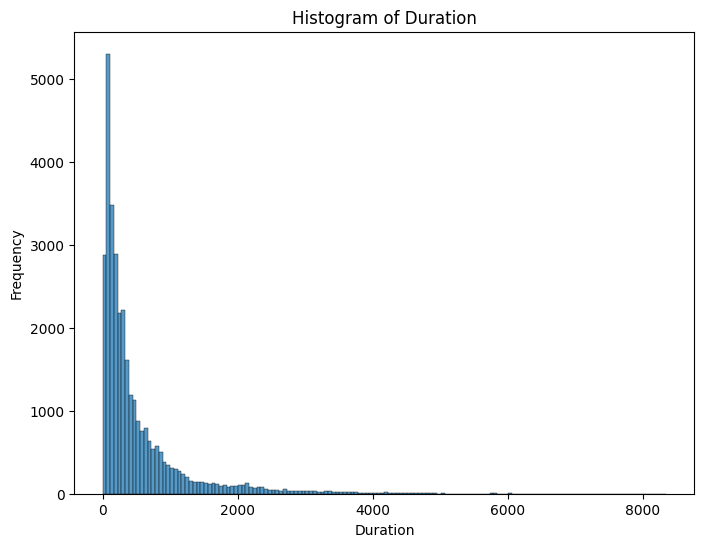

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df_I['Duration'], bins=150)
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

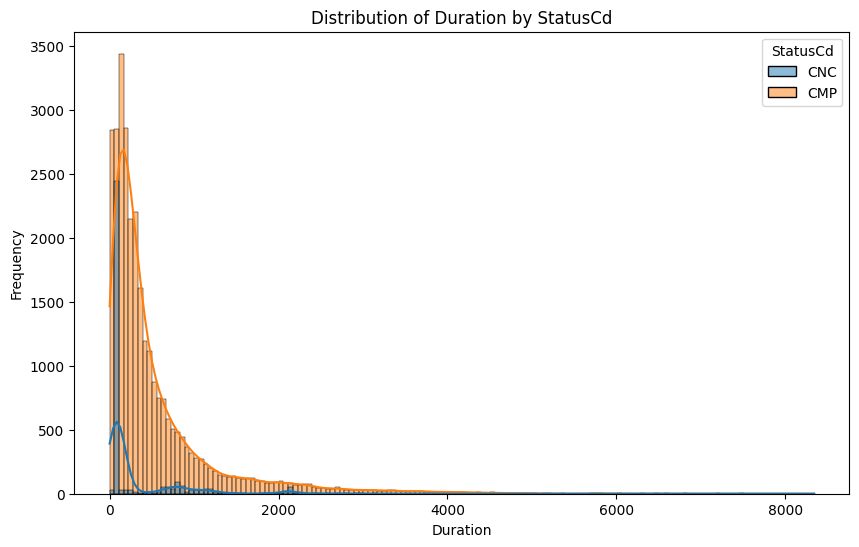

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_I, x='Duration', hue='StatusCd', kde=True, bins=150)
plt.title('Distribution of Duration by StatusCd')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

- Obviously there are lots of similar duration levels for the jobs where StatusCd is CNC, which means these jobs are cancelled.

- Therefore let's apply our algorithms after dopping the rows where StatusCd is CNC (We are interested in completed jobs anyway).

In [ ]:
df_I_CMP = df_I[df_I['StatusCd']=='CMP']
df_I_CMP['Duration'].describe()

,Duration
count,29547.000000
mean,542.866878
std,723.239003
min,0.020779
25%,139.670884
50%,290.503788
75%,629.346501
max,8344.107740


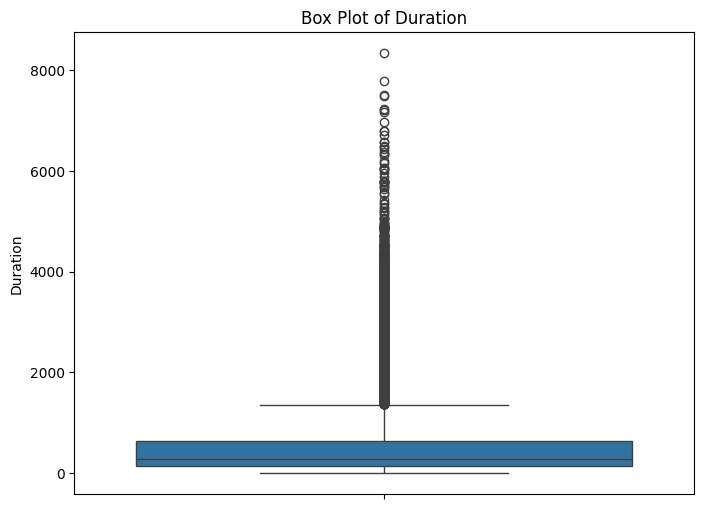

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_I_CMP['Duration'])
plt.title('Box Plot of Duration')
plt.ylabel('Duration')
plt.show()

# 4. CatBoost for Completed Jobs

In [ ]:
X = df_I_CMP[input_features]
y = df_I_CMP[target_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
categorical_feature_indices = np.where(X.dtypes == 'category')[0]
model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0)
model.fit(X_train, y_train, cat_features=categorical_feature_indices)  # Assuming you have identified categorical feature indexes



In [ ]:
#Make predictions
y_pred = model.predict(X_test)

# Evaluate using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print('r2', r2_score(y_test, y_pred))

Mean Squared Error: 167818.65
r2 0.6542947876258748


## 1% increase in R2

In [ ]:
feature_importance = model.get_feature_importance()
feature_names = X.columns

# Display feature importance
for name, importance in zip(feature_names, feature_importance):
    print(f"Feature: {name}, Importance: {importance:.2f}")

Feature: WfDefinitionId, Importance: 39.85
Feature: InstanceSourceId, Importance: 3.05
Feature: groupname, Importance: 0.41
Feature: division, Importance: 0.46
Feature: team1, Importance: 0.65
Feature: unit, Importance: 1.04
Feature: startgroupname, Importance: 0.82
Feature: Start_Month, Importance: 28.35
Feature: Start_Week, Importance: 25.37


### Cross Validation

In [ ]:
X = df_I_CMP[input_features]
y = df_I_CMP[target_feature]

categorical_feature_indices = np.where(X.dtypes =='category')[0]

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
r2_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = CatBoostRegressor(
        iterations=500,
        learning_rate=0.1,
        depth=6,
        verbose=0
    )

    model.fit(
        X_train, y_train,
        cat_features=categorical_feature_indices
    )

    y_pred = model.predict(X_val)

    mse_scores.append(mean_squared_error(y_val, y_pred))
    r2_scores.append(r2_score(y_val, y_pred))

    print(f"Fold {fold + 1} | MSE: {mse_scores[-1]:.2f} | R2: {r2_scores[-1]:.3f}")

print(f"\nCV MSE: {np.mean(mse_scores):.2f} ± {np.std(mse_scores):.2f}")
print(f"CV R2 : {np.mean(r2_scores):.3f}")

Fold 1 | MSE: 168065.31 | R2: 0.654
Fold 2 | MSE: 167019.11 | R2: 0.675
Fold 3 | MSE: 163747.52 | R2: 0.673
Fold 4 | MSE: 163852.59 | R2: 0.697
Fold 5 | MSE: 164992.89 | R2: 0.713

CV MSE: 165535.48 ± 1727.69
CV R2 : 0.682


### The R2 is increased from .657 to .682 when we add only completed jobs.